In [1]:
#%%IMPORTING
import xarray as xr
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import datetime
import matplotlib.colors as colors
divnorm = colors.TwoSlopeNorm(vcenter=0)
plt.rcParams.update({'font.size': 18})
from functions.loading_and_processing_data import loadMITgcmData,loadTimeSeriesData, detrend_and_average_MITgcmData, read_all_data
from functions.composite_maps import createCompositeMap, createVelocityCompositeMap, defineEvents, findEvents

In [23]:
%%capture
full=loadTimeSeriesData(filename='timeseries_final', members=[5,6], kind='old')
full['time']=full.indexes['time'].to_datetimeindex()

forcing=loadTimeSeriesData(filename='timeseries_forcing', members=[5,6], kind='old')
forcing['time']=forcing.indexes['time'].to_datetimeindex()

GEO=xr.open_dataset('../02_data/timeseries/timeseries_full_GEO06.nc')
GEO['time']=GEO.indexes['time'].to_datetimeindex()

In [6]:
GEO

<xarray.Dataset>
Dimensions:                           (time: 1128)
Coordinates:
  * time                              (time) object 2012-01-01 00:00:00 ... 2...
Data variables:
    amundsen_shelf_break_uwind_avg    (time) float64 ...
    all_massloss                      (time) float64 ...
    dotson_to_cosgrove_massloss       (time) float64 ...
    dotson_massloss                   (time) float64 ...
    pig_massloss                      (time) float64 ...
    thwaites_massloss                 (time) float64 ...
    cosgrove_massloss                 (time) float64 ...
    amundsen_shelf_ohc_below_0m       (time) float64 ...
    amundsen_shelf_temp_btw_200_700m  (time) float64 ...
    amundsen_shelf_salt_below_0m      (time) float64 ...
    amundsen_shelf_seaice_melt        (time) float64 ...
    amundsen_shelf_seaice_freeze      (time) float64 ...

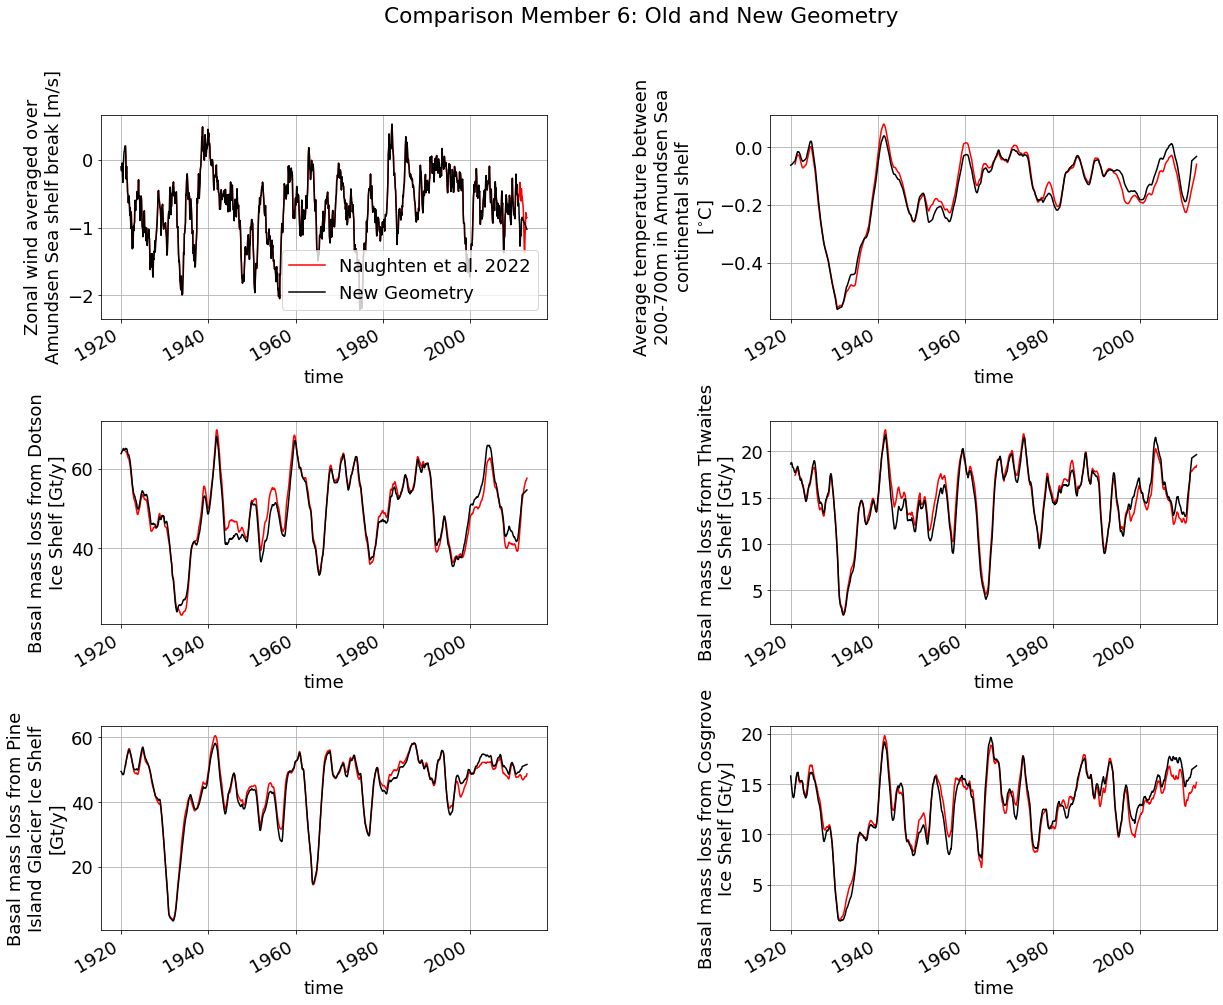

In [33]:
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
full['amundsen_shelf_break_uwind_avg'].sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean().plot(c='r', label='Naughten et al. 2022')
GEO['amundsen_shelf_break_uwind_avg'].rolling(time=24, center=True).mean().plot(c='k', label='New Geometry')
plt.legend()
plt.grid(True)

plt.subplot(3,2,2)
full['amundsen_shelf_temp_btw_200_700m'].sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean().plot(c='r', label='Naughten et al. 2022')
GEO['amundsen_shelf_temp_btw_200_700m'].rolling(time=24, center=True).mean().plot(c='k', label='New Geometry')
#plt.legend()
plt.grid(True)

plt.subplot(3,2,3)
full['dotson_massloss'].sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean().plot(c='r', label='Naughten et al. 2022')
GEO['dotson_massloss'].rolling(time=24, center=True).mean().plot(c='k', label='New Geometry')
#plt.legend()
plt.grid(True)


plt.subplot(3,2,4)
full['thwaites_massloss'].sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean().plot(c='r', label='Naughten et al. 2022')
GEO['thwaites_massloss'].rolling(time=24, center=True).mean().plot(c='k', label='New Geometry')
#plt.legend()
plt.grid(True)

plt.subplot(3,2,5)
full['pig_massloss'].sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean().plot(c='r', label='Naughten et al. 2022')
GEO['pig_massloss'].rolling(time=24, center=True).mean().plot(c='k', label='New Geometry')
#plt.legend()
plt.grid(True)


plt.subplot(3,2,6)
full['cosgrove_massloss'].sel(time=slice('1920', '2013')).rolling(time=24, center=True).mean().plot(c='r', label='Naughten et al. 2022')
GEO['cosgrove_massloss'].rolling(time=24, center=True).mean().plot(c='k', label='New Geometry')
#plt.legend()
plt.grid(True)

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle('Comparison Member 6: Old and New Geometry')
plt.savefig('../03_output/new_run/comparison_timeseries_member6.png')

In [9]:
GEO.time.max()

<xarray.DataArray 'time' ()>
array(cftime.DatetimeNoLeap(2013, 12, 1, 0, 0, 0, 0, has_year_zero=True),
      dtype=object)